In [132]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
#

import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys


19.17708619551845
NPass Loop for 1D array took 0.0002 seconds

3.0211053433845736 -1.8657025575454589


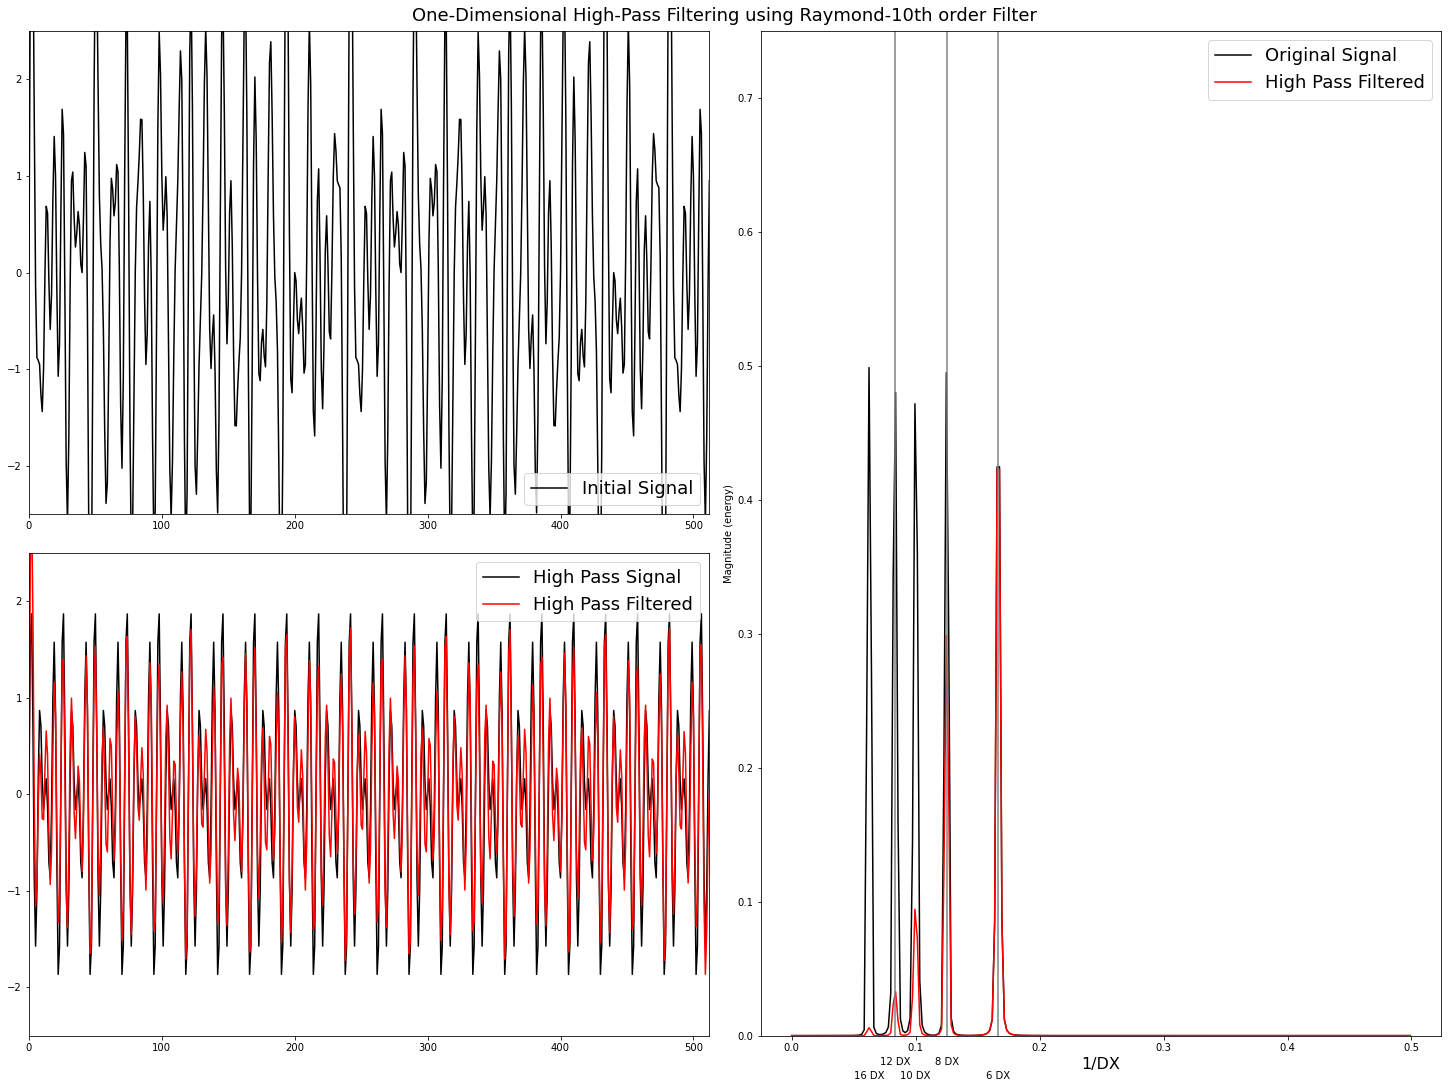

In [154]:
# Test 1D filtering with various filters.

from filter.RaymondFilters import RaymondFilter6, RaymondFilter10, RaymondFilter6F, inverseRaymondResponse
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        DX values
wave = [6.0, 8.0, 10.0, 12.0, 16.0]

ylim  = [-2.5,2.5]

nx    = 513

x     = np.arange(nx)

xlim  = [0,x[-1]]

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 10

eps_values = inverseRaymondResponse(0.8, [14, 12, 10, 8], order=6, npass=npass)

eps = eps_values[-2]

print(eps)

bc_reflect = False

field = np.zeros((nx,))

for w in wave:
    field = field + np.sin(2.0*np.pi*x/w)

ffield = field - RaymondFilter6F(field.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.plot(x, field, color='k', label='Total Signal')
ax1.legend(['Initial Signal'], fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# High pass plot

ax2.plot(x, field0+field1, color='k', label='High Pass Signal')
ax2.plot(x, ffield, color='r', label='High Pass Filtered')

print(ffield.max(), ffield.min())

ax2.set_xlim(xlim)
ax2.legend(fontsize=18)
ax2.set_ylim(ylim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field, Fs=1.0, color='k', label='Original Signal')
line2 = ax3.magnitude_spectrum(ffield, Fs=1.0, color='r', label='High Pass Filtered')
ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)
ax3.plot([1.0/wave1[1],1.0/wave1[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave2[1],1.0/wave2[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave0[1],1.0/wave0[1]], [0.0, 1.0], color='grey')
for n, w in enumerate(wave):
    if n % 2 == 0:
        y = -0.03
    else:
        y = -0.02
    ax3.text(1.0/w, y, "%d DX" % (int(w)), va="center", ha="center", fontsize=10)

ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond-10th order Filter", fontsize=18)
plt.show()



4.488860406614577


copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8
copied an array: size=251001, elsize=8


NPass Loop for 2D array took 0.3059 seconds



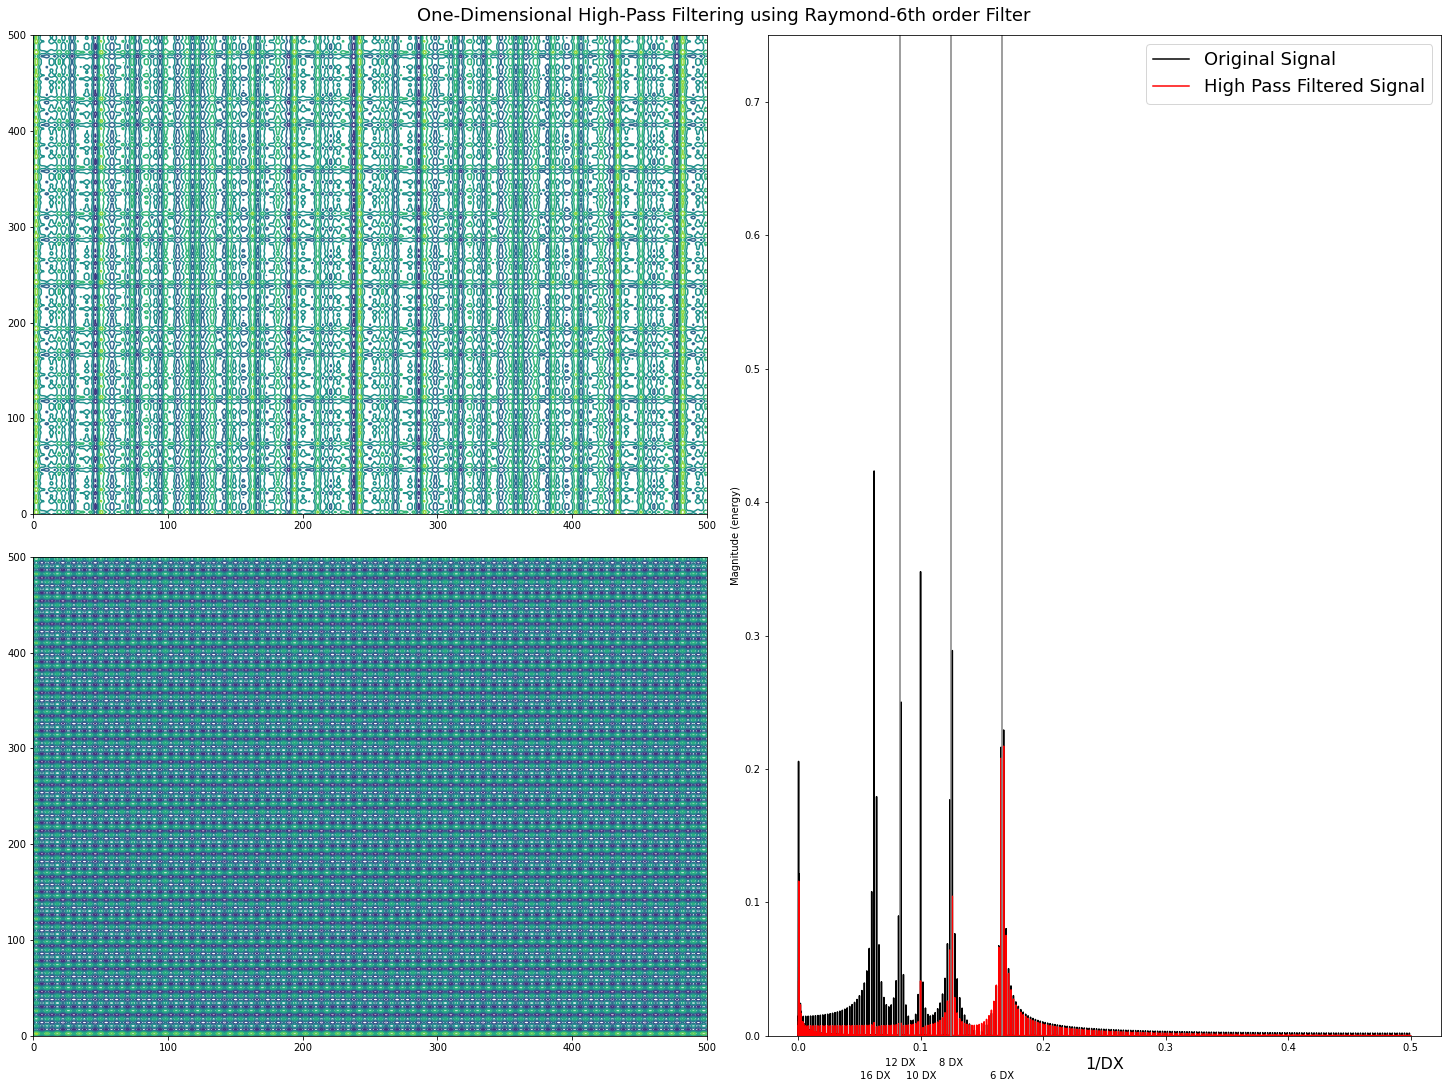

In [173]:
# Test 2D filtering with various filters.

from filter.RaymondFilters import RaymondFilter6F, scale6npass10
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#        DX values
wave = [6.0, 8.0, 10.0, 12.0, 16.0]

ylim  = [-2.5,2.5]

nx = 501

x     = np.arange(nx)

xlim  = [0,x[-1]]

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 20

eps_values = inverseRaymondResponse(0.9, [14, 12, 10, 8], order=6, npass=npass)

eps = eps_values[2]

print(eps)

bc_reflect = False

field2d = np.zeros((nx,nx))

# Fixing random state for reproducibility
np.random.seed(19680801)

for w in wave:
    
    amp = np.random.uniform(size=(1,))
    
    fieldx = amp*np.sin(2.0*np.pi*x/w)
    fieldy = (1.0-amp)*np.sin(2.0*np.pi*x/w)

    for i in np.arange(nx):
        for j in np.arange(nx):
            field2d[j,i] = field2d[j,i] + fieldx[i] + fieldy[j]

hp_field = field2d - RaymondFilter6F(field2d.copy(), eps, npass = npass, bc_reflect=bc_reflect)

fig = plt.figure(constrained_layout=True,figsize=(20,15))

gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[1, :-1])

ax1.contour(x, x, field2d)
#ax1.title('Initial Signal', fontsize=18)
ax1.set_xlim(xlim)
ax1.set_ylim(xlim)

ax2.contour(x, x, ffield)
#ax2.title('Final Signal', fontsize=18)
ax2.set_xlim(xlim)
ax2.set_ylim(xlim)

#-------------------------------------------------------------------------------------
# Spectrum plot

ax3 = fig.add_subplot(gs[:, 1])

line1 = ax3.magnitude_spectrum(field2d.flatten(), Fs=1.0, color='k', label='Original Signal')
line2 = ax3.magnitude_spectrum(hp_field.flatten(), Fs=1.0, color='r', label='High Pass Filtered Signal')


ax3.legend(fontsize=18)
ax3.set_ylim(.0,0.75)

ax3.plot([1.0/wave1[1],1.0/wave1[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave2[1],1.0/wave2[1]], [0.0, 1.0], color='grey')
ax3.plot([1.0/wave0[1],1.0/wave0[1]], [0.0, 1.0], color='grey')
for n, w in enumerate(wave):
    if n % 2 == 0:
        y = -0.03
    else:
        y = -0.02
    ax3.text(1.0/w, y, "%d DX" % (int(w)), va="center", ha="center", fontsize=10)

ax3.set_xlabel("1/DX", fontsize=16)
ax3.set_xlabel("1/DX", fontsize=16)

plt.suptitle("One-Dimensional High-Pass Filtering using Raymond-6th order Filter", fontsize=18)
plt.show()
